# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# 設定 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Python\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.4470 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 56us/step - loss: 14.4438 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 2s 49us/step - loss: 1.7808 - acc: 0.3593 - val_loss: 1.7570 - val_acc: 0.3489
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7116 - acc: 0.3860 - val_loss: 1.8146 - val_acc: 0.3618
Epoch 5/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6537 - acc: 0.4091 - val_loss: 1.8167 - val_acc: 0.3669
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6143 - acc: 0.4232 - val_loss: 1.6720 - val_acc: 0.4157
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.5675 - acc: 0.4388 - val_loss: 1.6521 - val_acc: 0.4161
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5361 - acc: 0.4525 - val_loss: 1.5778 - val_acc: 0.4316
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4978 - acc: 0.4674 - val_loss: 1.5672 - val_acc: 0.4430
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 48us/step - loss: 1.5089 - acc: 0.4625 - val_loss: 1.4914 - val_acc: 0.4659
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4629 - acc: 0.4791 - val_loss: 1.4939 - val_acc: 0.4704
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4298 - acc: 0.4901 - val_loss: 1.5143 - val_acc: 0.4623
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4104 - acc: 0.4988 - val_loss: 1.4558 - val_acc: 0.4830
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3748 - acc: 0.5092 - val_loss: 1.4280 - val_acc: 0.4893
Epoch 10/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3515 - acc: 0.5194 - val_loss: 1.4243 - val_acc: 0.4857
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3257 - acc: 0.5291 - val_loss: 1.4266 - val_acc: 0.4936
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 47us/step - loss: 1.5505 - acc: 0.4525 - val_loss: 1.5801 - val_acc: 0.4508
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5202 - acc: 0.4639 - val_loss: 1.7086 - val_acc: 0.3979
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4959 - acc: 0.4742 - val_loss: 1.5137 - val_acc: 0.4651
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4719 - acc: 0.4823 - val_loss: 1.5566 - val_acc: 0.4353
Epoch 11/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4539 - acc: 0.4902 - val_loss: 1.6968 - val_acc: 0.3892
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4298 - acc: 0.4955 - val_loss: 1.5272 - val_acc: 0.4608
Epoch 13/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4093 - acc: 0.5034 - val_loss: 1.5111 - val_acc: 0.4618
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 48us/step - loss: 1.4126 - acc: 0.5022 - val_loss: 1.4602 - val_acc: 0.4809
Epoch 10/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3880 - acc: 0.5125 - val_loss: 1.4334 - val_acc: 0.4937
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3669 - acc: 0.5209 - val_loss: 1.4137 - val_acc: 0.4925
Epoch 12/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3458 - acc: 0.5254 - val_loss: 1.4088 - val_acc: 0.4998
Epoch 13/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3231 - acc: 0.5350 - val_loss: 1.4242 - val_acc: 0.4915
Epoch 14/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3054 - acc: 0.5433 - val_loss: 1.3895 - val_acc: 0.5049
Epoch 15/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2924 - acc: 0.5461 - val_loss: 1.3998 - val_acc: 0.5055
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 1.6728 - acc: 0.4201 - val_loss: 1.6817 - val_acc: 0.4127
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6587 - acc: 0.4262 - val_loss: 1.6709 - val_acc: 0.4258
Epoch 13/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6458 - acc: 0.4297 - val_loss: 1.6591 - val_acc: 0.4218
Epoch 14/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6341 - acc: 0.4333 - val_loss: 1.6469 - val_acc: 0.4289
Epoch 15/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6230 - acc: 0.4369 - val_loss: 1.6339 - val_acc: 0.4351
Epoch 16/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6131 - acc: 0.4419 - val_loss: 1.6356 - val_acc: 0.4278
Epoch 17/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6024 - acc: 0.4459 - val_loss: 1.6171 - val_acc: 0.4416
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 1.6330 - acc: 0.4331 - val_loss: 1.6359 - val_acc: 0.4332
Epoch 14/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6200 - acc: 0.4396 - val_loss: 1.6246 - val_acc: 0.4369
Epoch 15/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6065 - acc: 0.4427 - val_loss: 1.6177 - val_acc: 0.4389
Epoch 16/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5957 - acc: 0.4474 - val_loss: 1.6043 - val_acc: 0.4427
Epoch 17/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5848 - acc: 0.4497 - val_loss: 1.5993 - val_acc: 0.4417
Epoch 18/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5749 - acc: 0.4530 - val_loss: 1.5889 - val_acc: 0.4489
Epoch 19/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5644 - acc: 0.4592 - val_loss: 1.5744 - val_acc: 0.4557
Epoch 20/50
50000/50000 [=====================

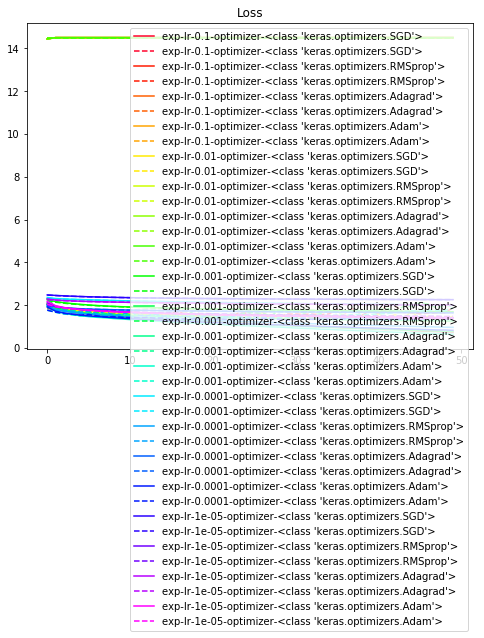

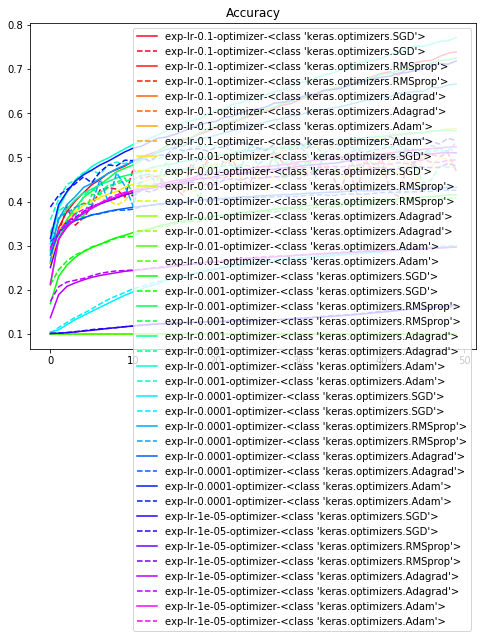

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()